In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



# Top 75 Player Efficiency on Offense and Defense

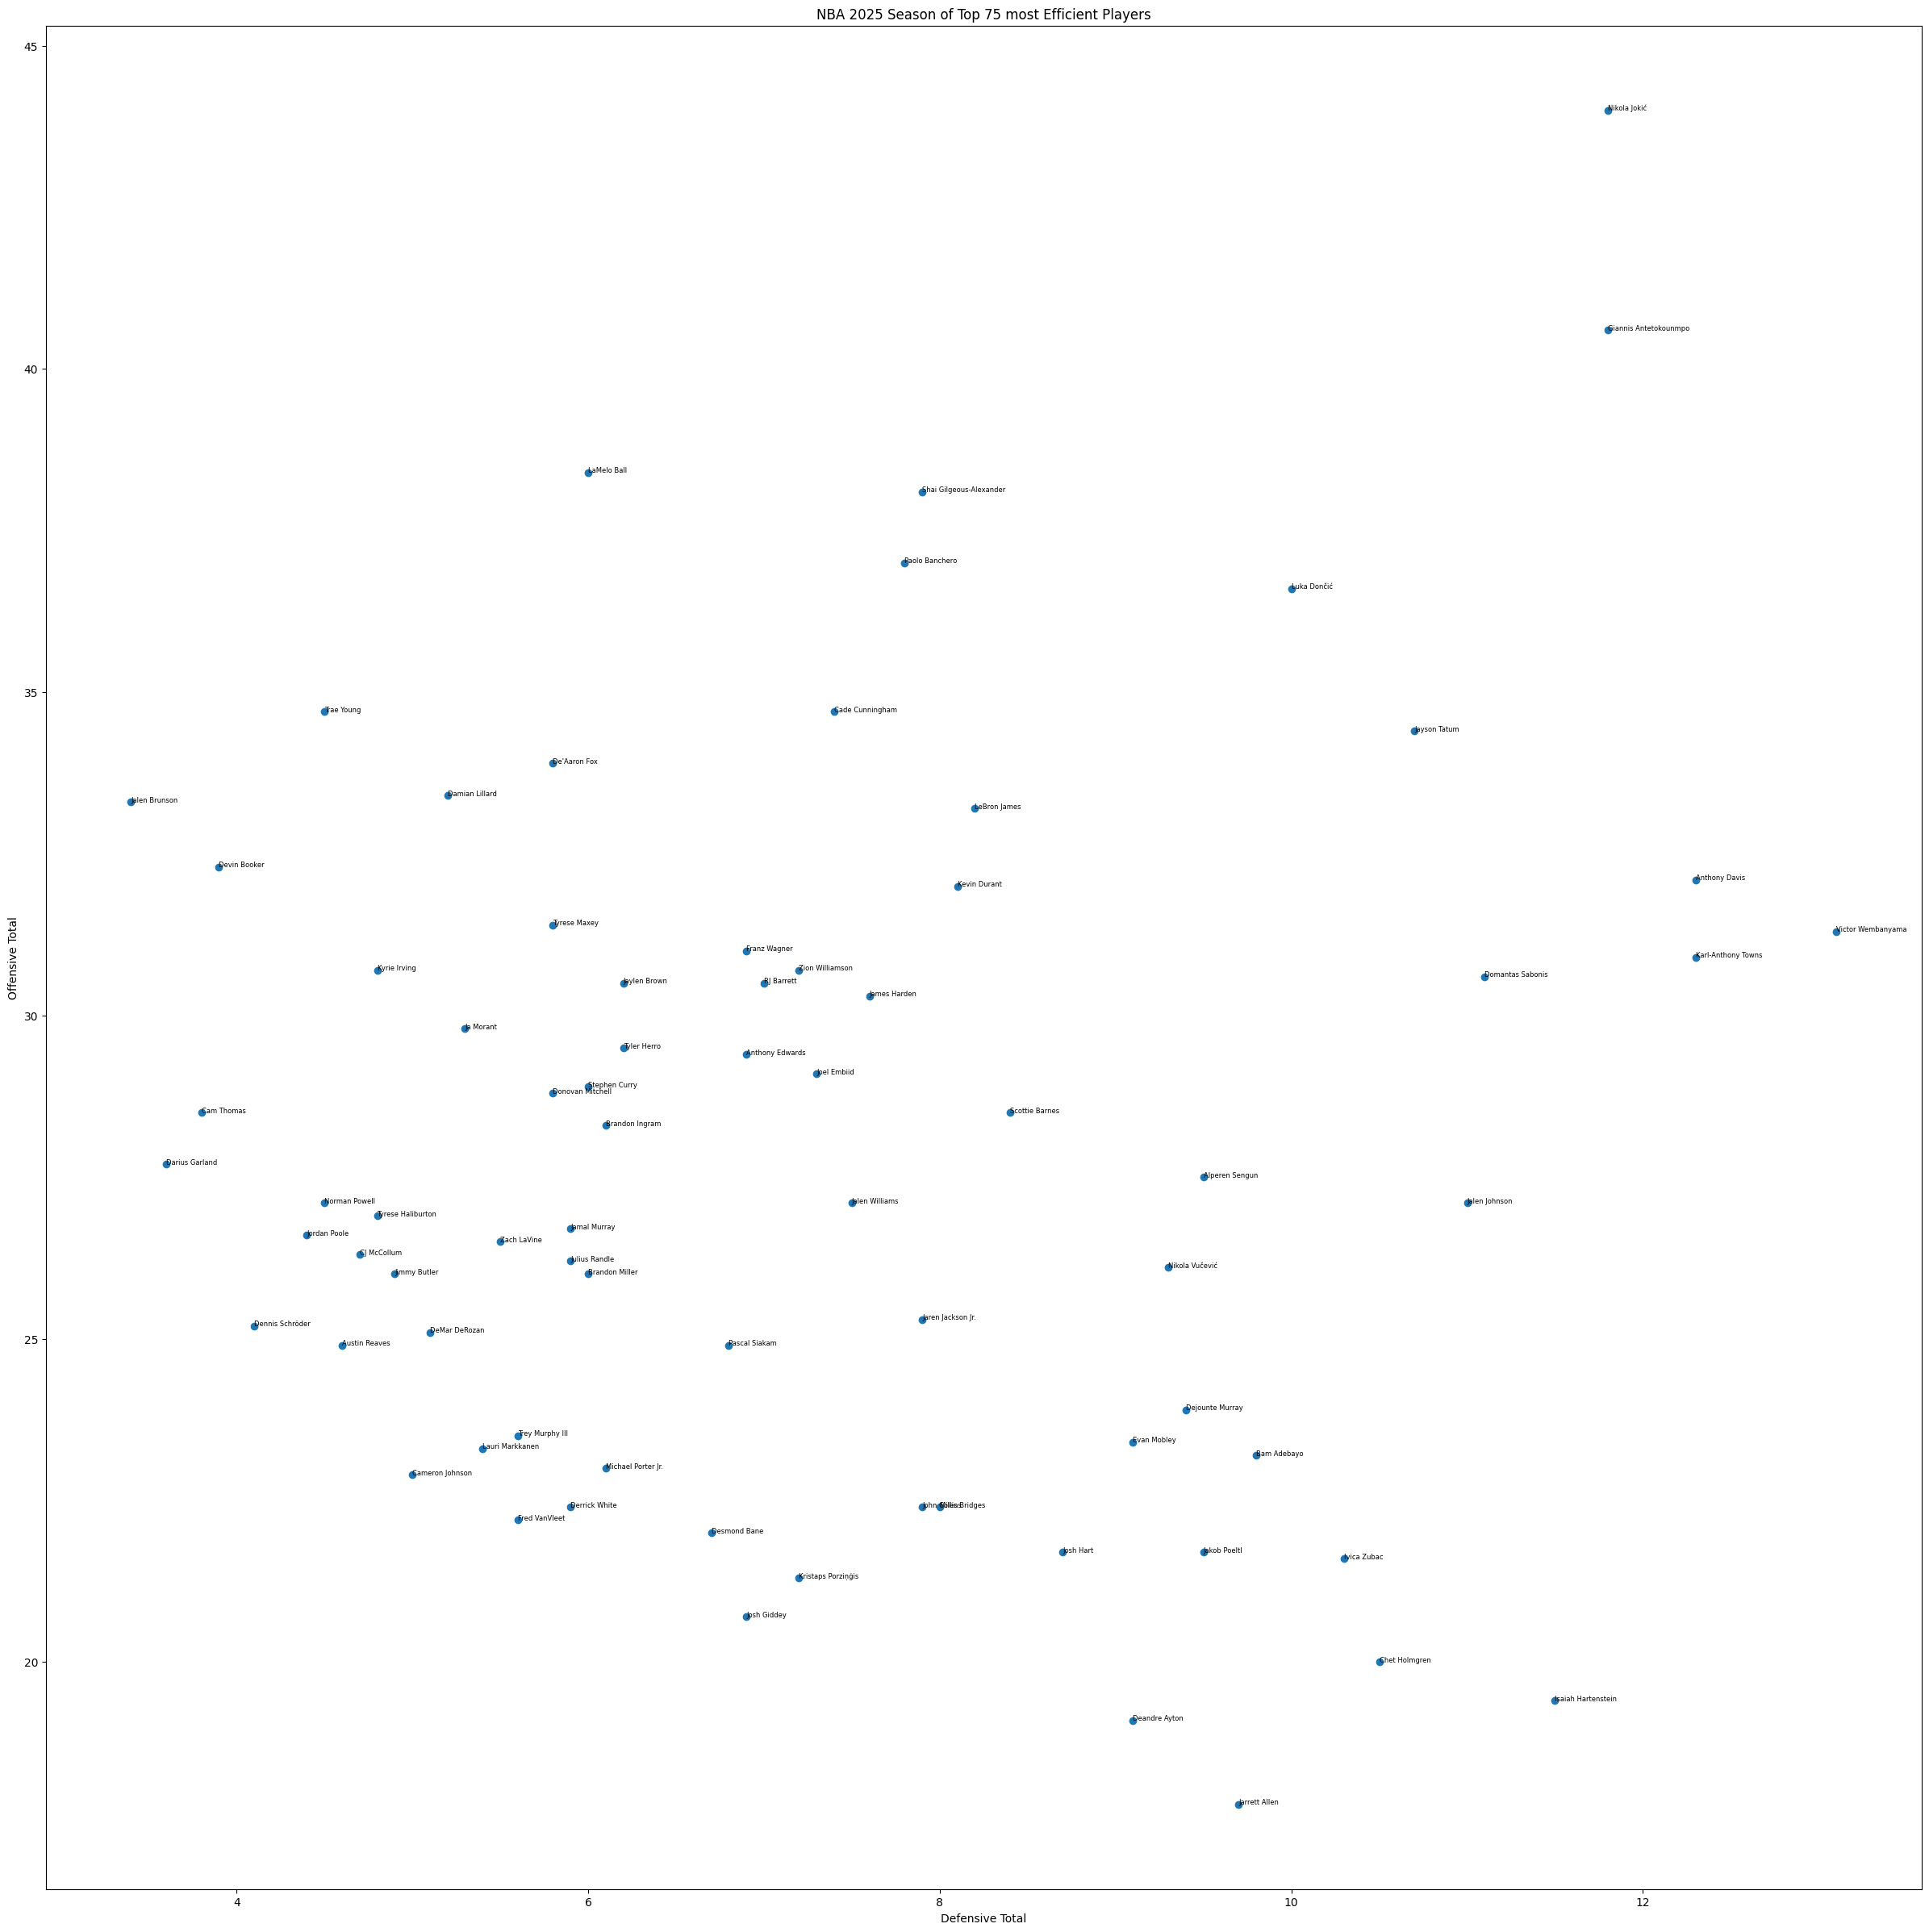

In [122]:
#Gather 2025 Season Player Stats
sample_data = pd.read_csv('Player Per Game.csv')

player_Stats_2025 = sample_data[sample_data['season'] == 2025]

player_Stats_2025.to_csv('2025 Stats Per Game.csv', index = False)

player_Stats_2025 = pd.read_csv('2025 Stats Per Game.csv')

#Creating New Columns to see efficiency. Efficiency is measured based on off offensive/defensive stats and subtracting that by fouls and turnovers.
player_Stats_2025['offensive_Total'] = player_Stats_2025.loc[:, ['orb_per_game', 'ast_per_game', 'pts_per_game']].sum(axis=1)

player_Stats_2025['defensive_Total'] = player_Stats_2025.loc[:, ['drb_per_game', 'stl_per_game', 'blk_per_game']].sum(axis=1)

player_Stats_2025['negative_Total'] = player_Stats_2025.loc[:, ['tov_per_game', 'pf_per_game']].sum(axis=1)

player_Stats_2025['efficiency'] = (
    player_Stats_2025['offensive_Total'] 
    + player_Stats_2025['defensive_Total'] 
    - player_Stats_2025['negative_Total']
)

#Sort by Top 75 and create lists for scatterplot
efficiency = player_Stats_2025.sort_values(by = 'efficiency', ascending = False).head(75)

efficiency.reset_index(drop = True, inplace = True)
 
efficiency_ODE = efficiency.loc[:,['player','offensive_Total', 'defensive_Total','efficiency']]

players = efficiency.loc[:,'player'].to_list()
offensive_Total = efficiency.loc[:,'offensive_Total'].to_list()
defensive_Total = efficiency.loc[:,'defensive_Total'].to_list()

#Creating Scatterplot
plt.figure(figsize=(30, 30))

plt.scatter(defensive_Total,offensive_Total)

for i, name in enumerate(players):
    plt.text(defensive_Total[i],offensive_Total[i],name, fontsize = 6)

plt.title('NBA 2025 Season of Top 75 most Efficient Players')
plt.xlabel('Defensive Total')
plt.ylabel('Offensive Total')

plt.show()




# Top 10 Colleges with the Most NBA Players

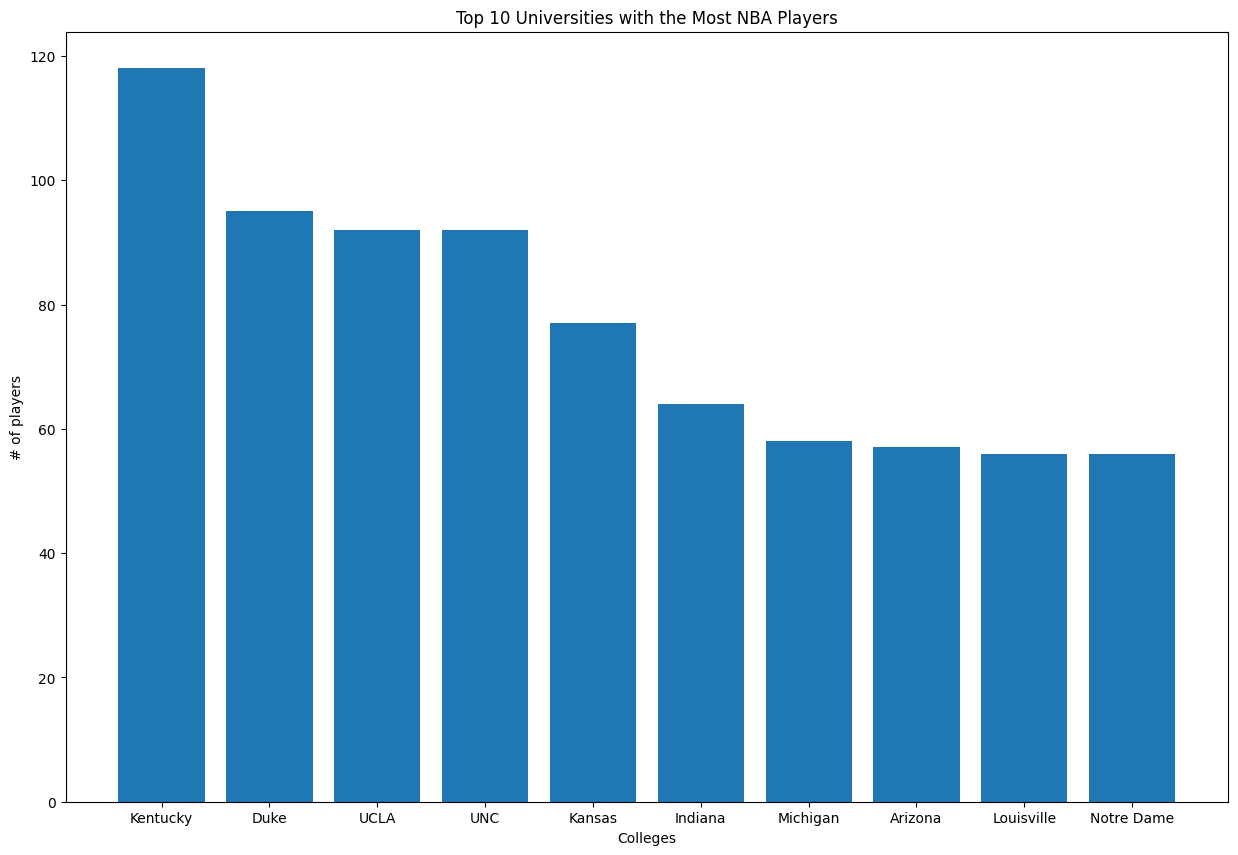

In [15]:
#Filter Data
df = pd.read_csv('Player Directory.csv')

college_list = df.loc[:,'colleges'].to_list()

college_dic = {}

for college in college_list:
    if college in college_dic:
        college_dic[college] += 1
    else:
        college_dic[college] = 1
        
top_10 = dict((sorted(college_dic.items(), key = lambda x : x[1], reverse = True))[1:11])

college_name = list(top_10.keys())

college_val = list(top_10.values())

#create Graph
plt.figure(figsize=(15, 10))

plt.xlabel('Colleges')

plt.ylabel('# of players')

plt.title('Top 10 Universities with the Most NBA Players')


bars = plt.bar(college_name,college_val)

plt.show()


# 2025 NBA Center Position Comparison, Bam Adebayo vs Jaren Jackson Jr.

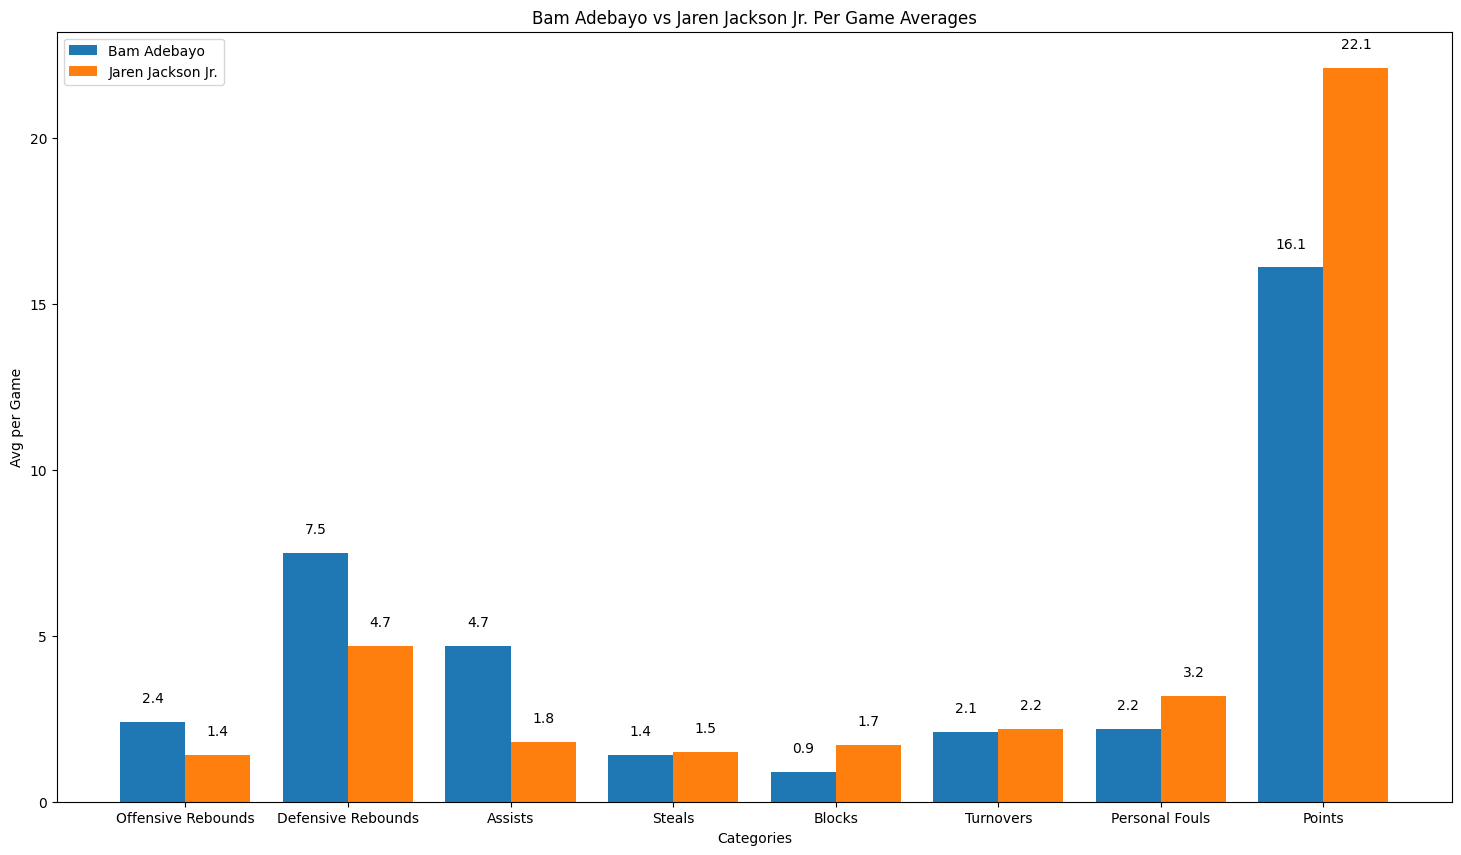

In [3]:
#Filter Data
player_totals = pd.read_csv('Player Per Game.csv')

bam_stats = player_totals.loc[(player_totals['player'] == 'Bam Adebayo') & (player_totals['season'] == 2025)]

jaren_stats = player_totals.loc[(player_totals['player'] == 'Jaren Jackson Jr.') & (player_totals['season'] == 2025)]

bam_lst = bam_stats.loc[:,['orb_per_game','drb_per_game','ast_per_game','stl_per_game','blk_per_game','tov_per_game',
                           'pf_per_game','pts_per_game']].values.flatten().tolist()
jaren_lst = jaren_stats.loc[:,['orb_per_game','drb_per_game','ast_per_game','stl_per_game','blk_per_game','tov_per_game',
                           'pf_per_game','pts_per_game']].values.flatten().tolist()

categories = ['Offensive Rebounds','Defensive Rebounds','Assists','Steals','Blocks','Turnovers','Personal Fouls','Points']


#Create Graph
plt.figure(figsize=(18, 10))

x = np.arange(len(categories))
width = 0.4

bam = plt.bar(x - width/2, bam_lst,width)

jaren = plt.bar(x + width/2, jaren_lst,width)

plt.bar(categories,0)

plt.legend(['Bam Adebayo','Jaren Jackson Jr.'])

for bar in bam:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,
             str(yval), ha='center', va='bottom') 
for bar in jaren:
    yval =  bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,
             str(yval), ha='center', va='bottom')

plt.xlabel('Categories')

plt.ylabel('Avg per Game')

plt.title('Bam Adebayo vs Jaren Jackson Jr. Per Game Averages')

plt.show()


